# Morphology Tutorial

Mathematical morphology (MM) is a theoretical model for digital images built upon lattice theory and topology. It is the foundation of morphological image processing, which is based on shift-invariant (translation invariant) operators.Originally developed for binary images it has now been successfully extend to grey scale images.

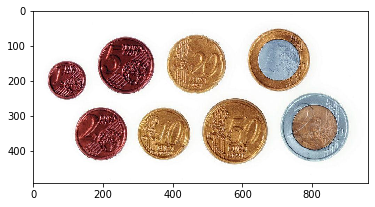

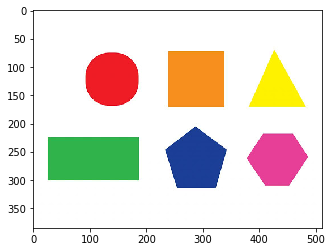

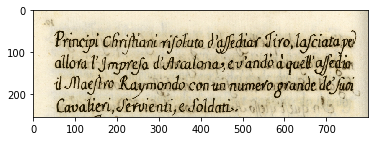

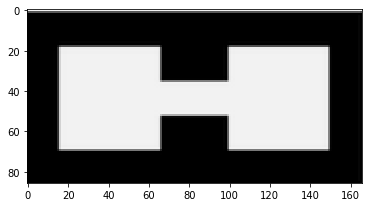

In [2]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

images = {}
for x in os.listdir("images"):
    images[x] = cv2.imread("images/" + x)
    temp = images[x][:,:,::-1]
    plt.imshow(temp, interpolation='nearest')
    plt.show()
    

<b style="font-size:18px;">Exercise 1.0 - Connected Components</b>

Using opencv research how to use connectedComponents() function.  
Download image shapes.jpg and euro_coins.jpg. Apply the connected components function to segment the objects in the image. You can if you want also use the findContour() opencv method to extract the ROI (seperate shapes as new images). Vary the connectivity value (4 or 8) and document results. 

<i style="color:red">Do not forget to convert the image to binary, your objects should be white.</i>



C:\Users\maxma\AppData\Local\Temp\ipykernel_4688\1651644791.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


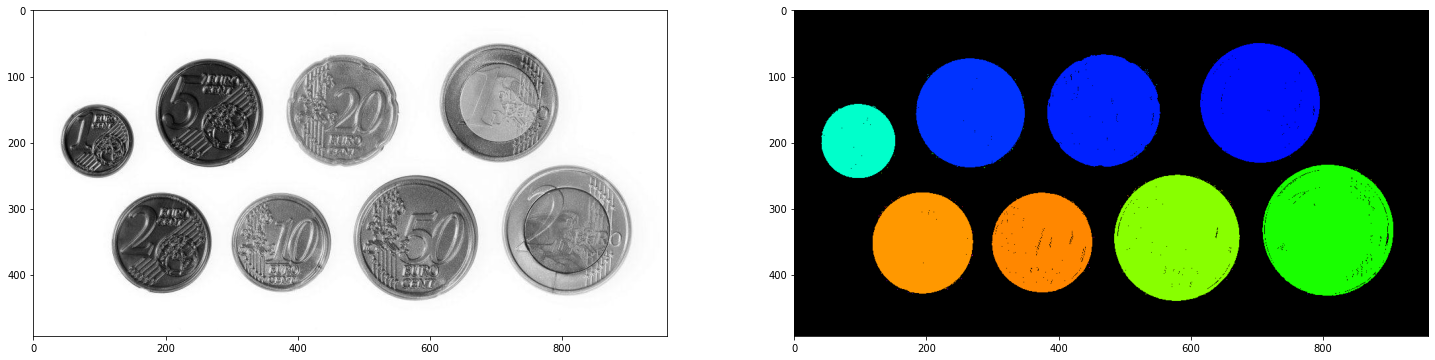

In [3]:
def conComp(image, thresholdValue):	
    grayImage = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #images[os.listdir("images")[2]]
    i = cv2.threshold(grayImage, thresholdValue, 255, cv2.THRESH_BINARY_INV)[1]
    
    # contours, hierarchies = cv2.findContours(grayImage, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    ret, labels = cv2.connectedComponents(i, connectivity=8)
    label_hue = np.uint8(176*labels/np.max(labels))
    temp = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, temp, temp])
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
    labeled_img[label_hue==0] = 0

    fig = plt.figure(figsize=(25, 20))
    ax1, ax2= fig.add_subplot(121), fig.add_subplot(122)
    ax1.imshow(grayImage, cmap='gray')
    ax2.imshow(labeled_img)
    fig.show()

conComp(images[os.listdir("images")[0]][:,:,::-1], 230)

<b style="font-size:18px;">Exercise 1.1 - Dilation</b>

Download the image file handwritten text.png from VLE. Apply the opencv method for dilation (dilate()). Vary the dilation filter and compare results using histograms. What can you observe?

C:\Users\maxma\AppData\Local\Temp\ipykernel_4688\3093978225.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\maxma\AppData\Local\Temp\ipykernel_4688\3093978225.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


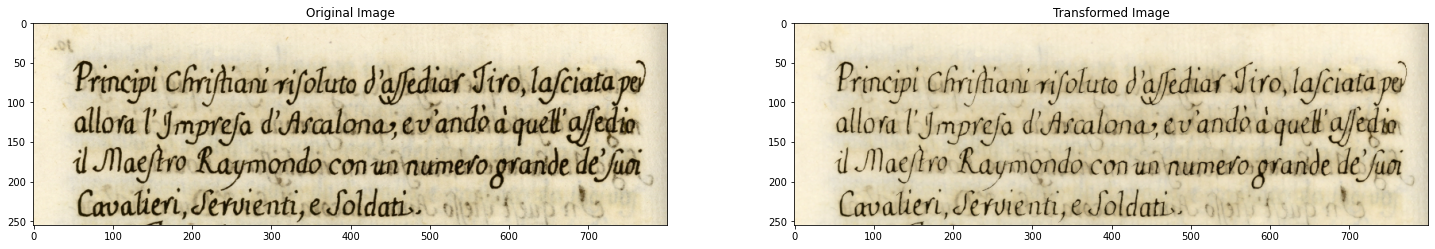

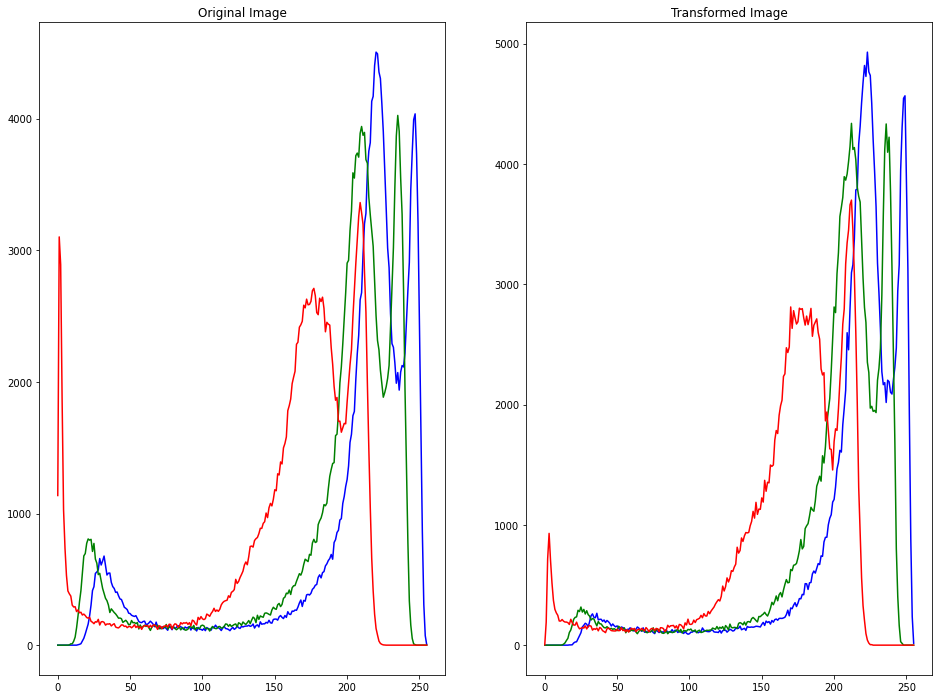

In [4]:
def showImages(img1, img2):
    fig = plt.figure(figsize=(25, 20))
    ax1, ax2= fig.add_subplot(121), fig.add_subplot(122)
    ax1.set_title("Original Image")
    ax2.set_title("Transformed Image")
    ax1.imshow(img1)
    ax2.imshow(img2, cmap='gray')
    fig.show()

def plotHist(img, outImg):
    colours = ('b', 'g', 'r')
    fig = plt.figure(figsize=(16, 12))
    ax1, ax2= fig.add_subplot(121), fig.add_subplot(122)
    for i, colour in enumerate(colours):
        hist1 = cv2.calcHist([img], [i], None, [256], [0,256])
        hist2 = cv2.calcHist([outImg], [i], None, [256], [0,256])
        ax1.set_title("Original Image")
        ax2.set_title("Transformed Image")
        ax1.plot(hist1, color = colour)
        ax2.plot(hist2, color = colour)
    fig.show()

def dilation(image, dilationFilter):
    kernel = np.ones((dilationFilter, dilationFilter), np.uint8)
    d = cv2.dilate(image, kernel, iterations = 1)

    return d

img2 = dilation(images[os.listdir("images")[2]][:,:,::-1], 2)
showImages(images[os.listdir("images")[2]][:,:,::-1], img2)
plotHist(images[os.listdir("images")[2]][:,:,::-1], img2)

<b style="font-size:18px;">Exercise 1.2 - Erosion</b>

Using the same text based image from the previous exercise apply the opencv method for erosion (erode()). Vary the erosion filter and compare results using histograms. What can you observe?

C:\Users\maxma\AppData\Local\Temp\ipykernel_4688\3093978225.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\maxma\AppData\Local\Temp\ipykernel_4688\3093978225.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


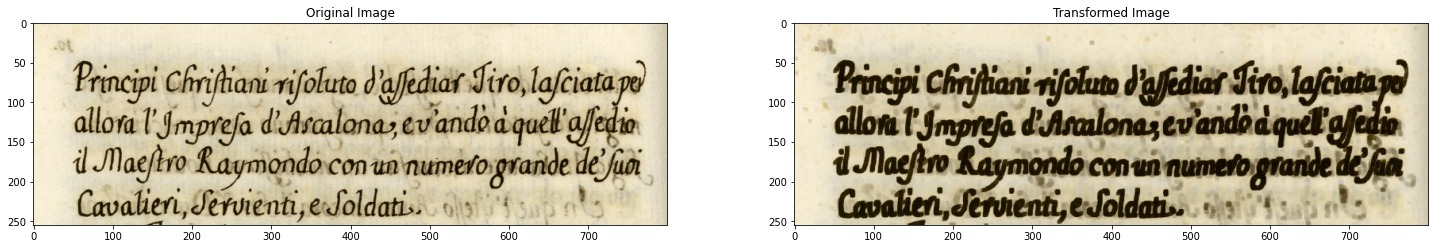

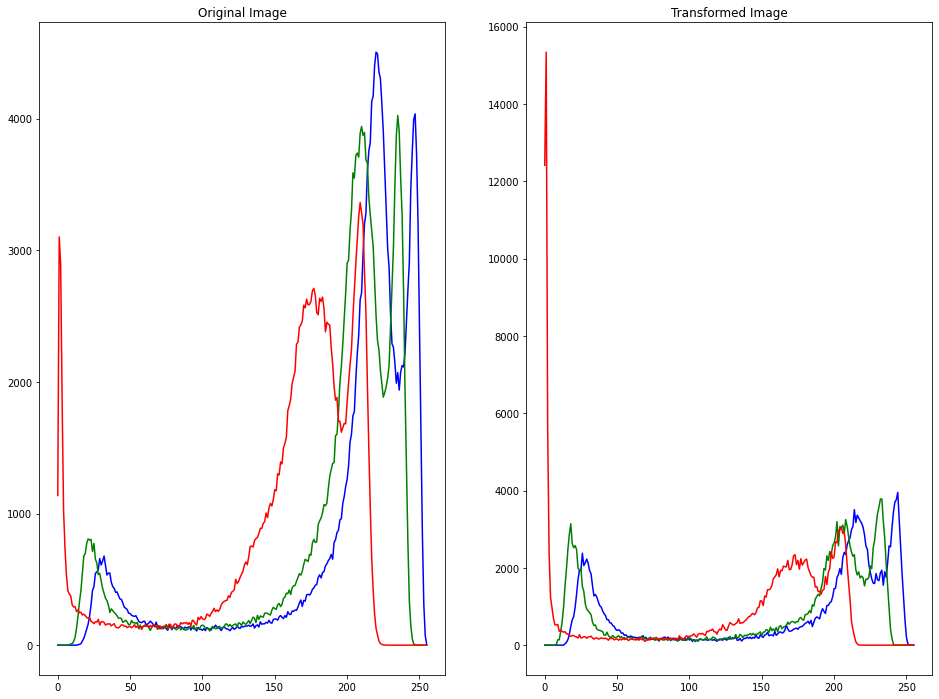

In [5]:
def erosion(image, dilationFilter):
    kernel = np.ones((dilationFilter, dilationFilter), np.uint8)
    d = cv2.erode(image, kernel, iterations = 1)

    return d

img2 = erosion(images[os.listdir("images")[2]][:,:,::-1], 4)
showImages(images[os.listdir("images")[2]][:,:,::-1], img2)
plotHist(images[os.listdir("images")[2]][:,:,::-1], img2)

<b style="font-size:18px;">Exercise 1.3 - Opening</b>

Opening is an applied process of erosion followed by dilation. It is typically used to segment neck parts of shapes found within an image. 

It is also used in Text segmentation to seperate lines and words and sometimes characters.
Using the same text image from previous exercises apply this process of opening to visually separate lines words and characters.


C:\Users\maxma\AppData\Local\Temp\ipykernel_4688\3093978225.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


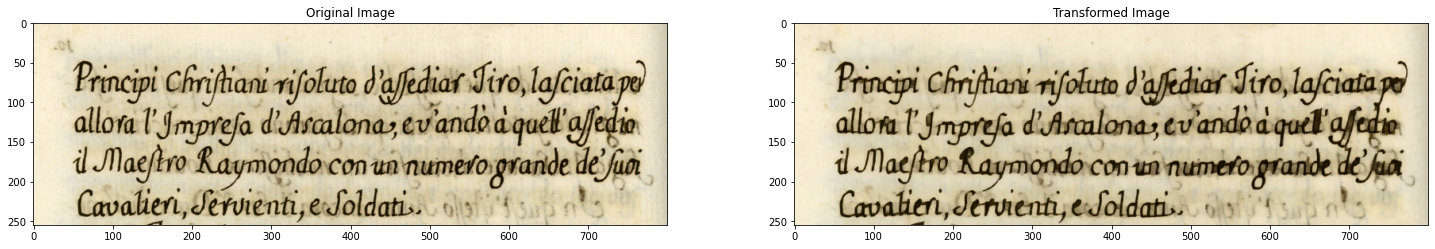

In [43]:
def opening(img, factor):
    kernel = np.ones((factor, factor), np.uint8)
    return cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)



img = images[os.listdir("images")[2]][:,:,::-1]

output = opening(img, 4)
showImages(img, output)

<b style="font-size:18px;">Exercise 1.4 - Closing</b>

Closing is an applied process of dilation followed by erosion. It is typically used to fill in shapes found within an image. It is also used in Text segmentation to reinforce eroded characters.

Using the same text image from previous exercises apply this process of opening to visually separate lines words and characters.


C:\Users\maxma\AppData\Local\Temp\ipykernel_4688\3093978225.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


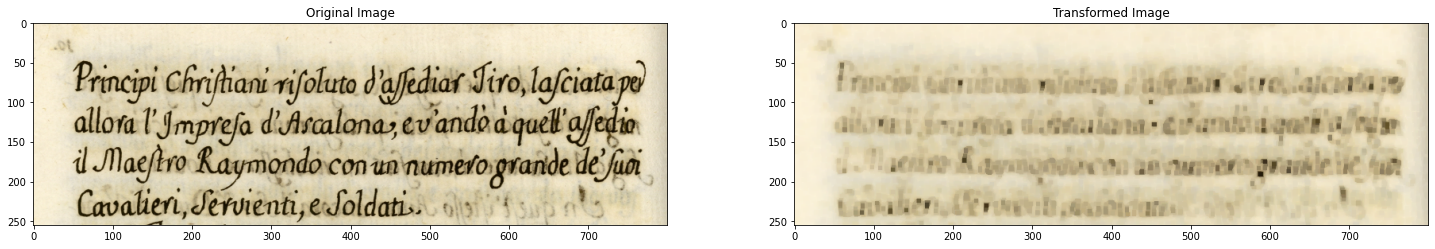

In [44]:
def closing(img, factor):
    kernel = np.ones((factor, factor), np.uint8)
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)


img = images[os.listdir("images")[2]][:,:,::-1]
output = closing(img, 5)
showImages(img, output)


<b style="font-size:18px;">Exercise 1.5 - Segmentation</b>

Using histograms, apply any of the morphological techniques used in the previous exercises to try and segment the text into seperate lines. The lines do not have to be perfect. 

C:\Users\maxma\AppData\Local\Temp\ipykernel_4688\3093978225.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


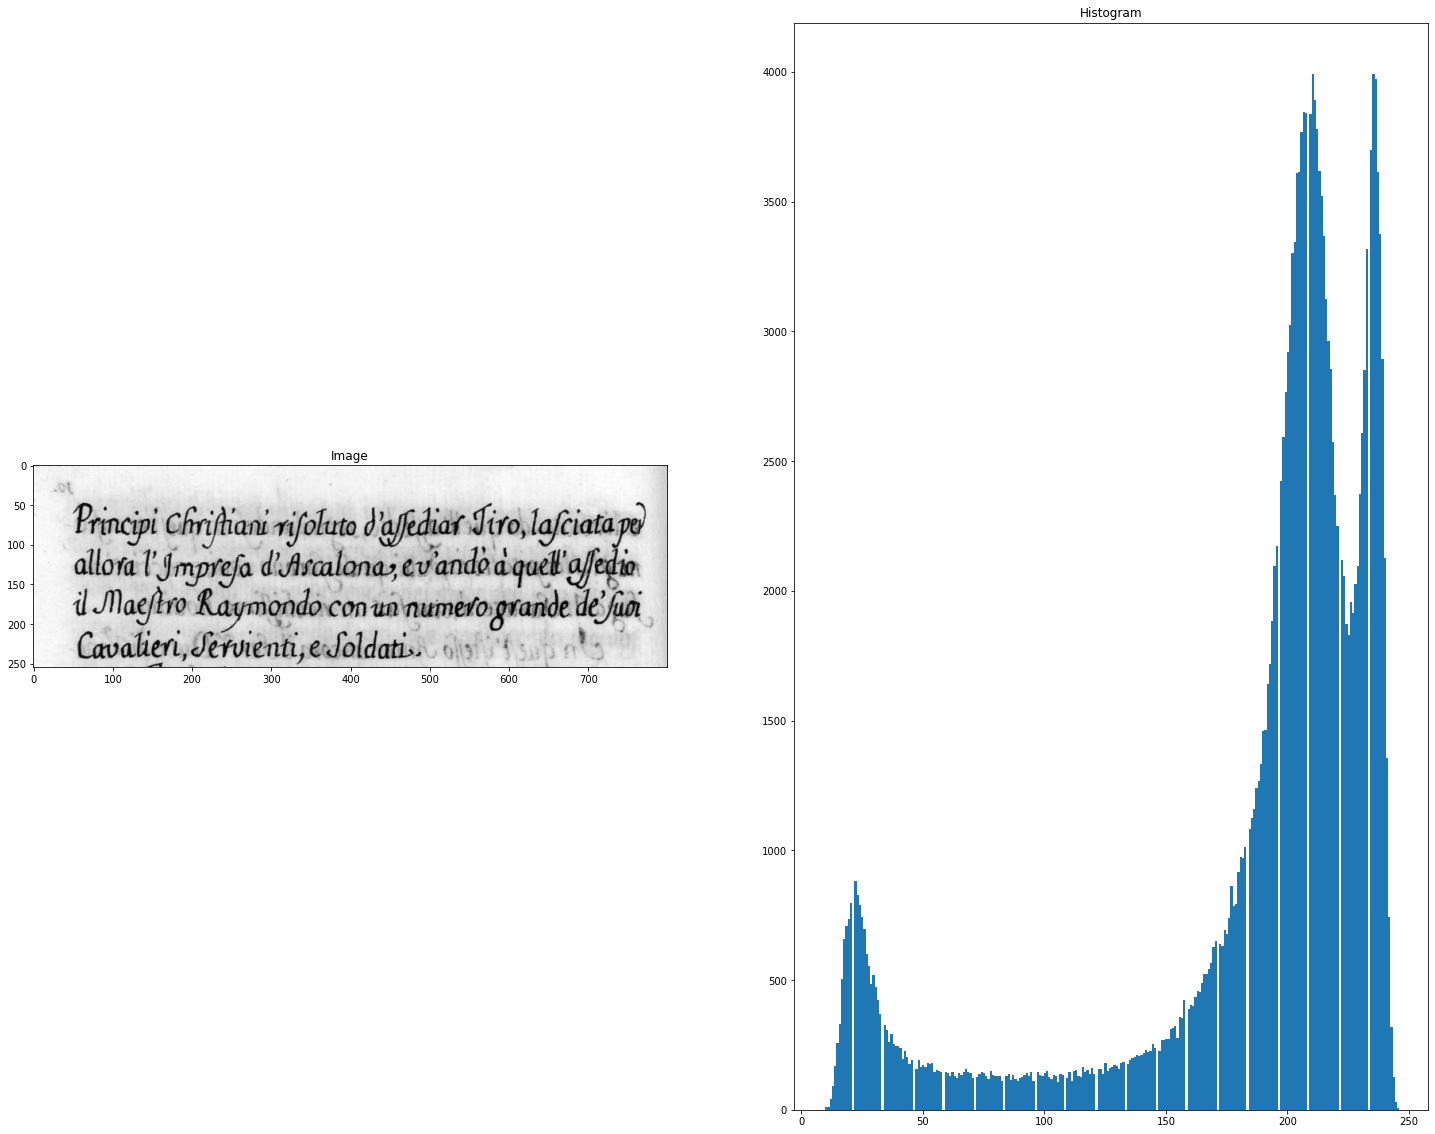

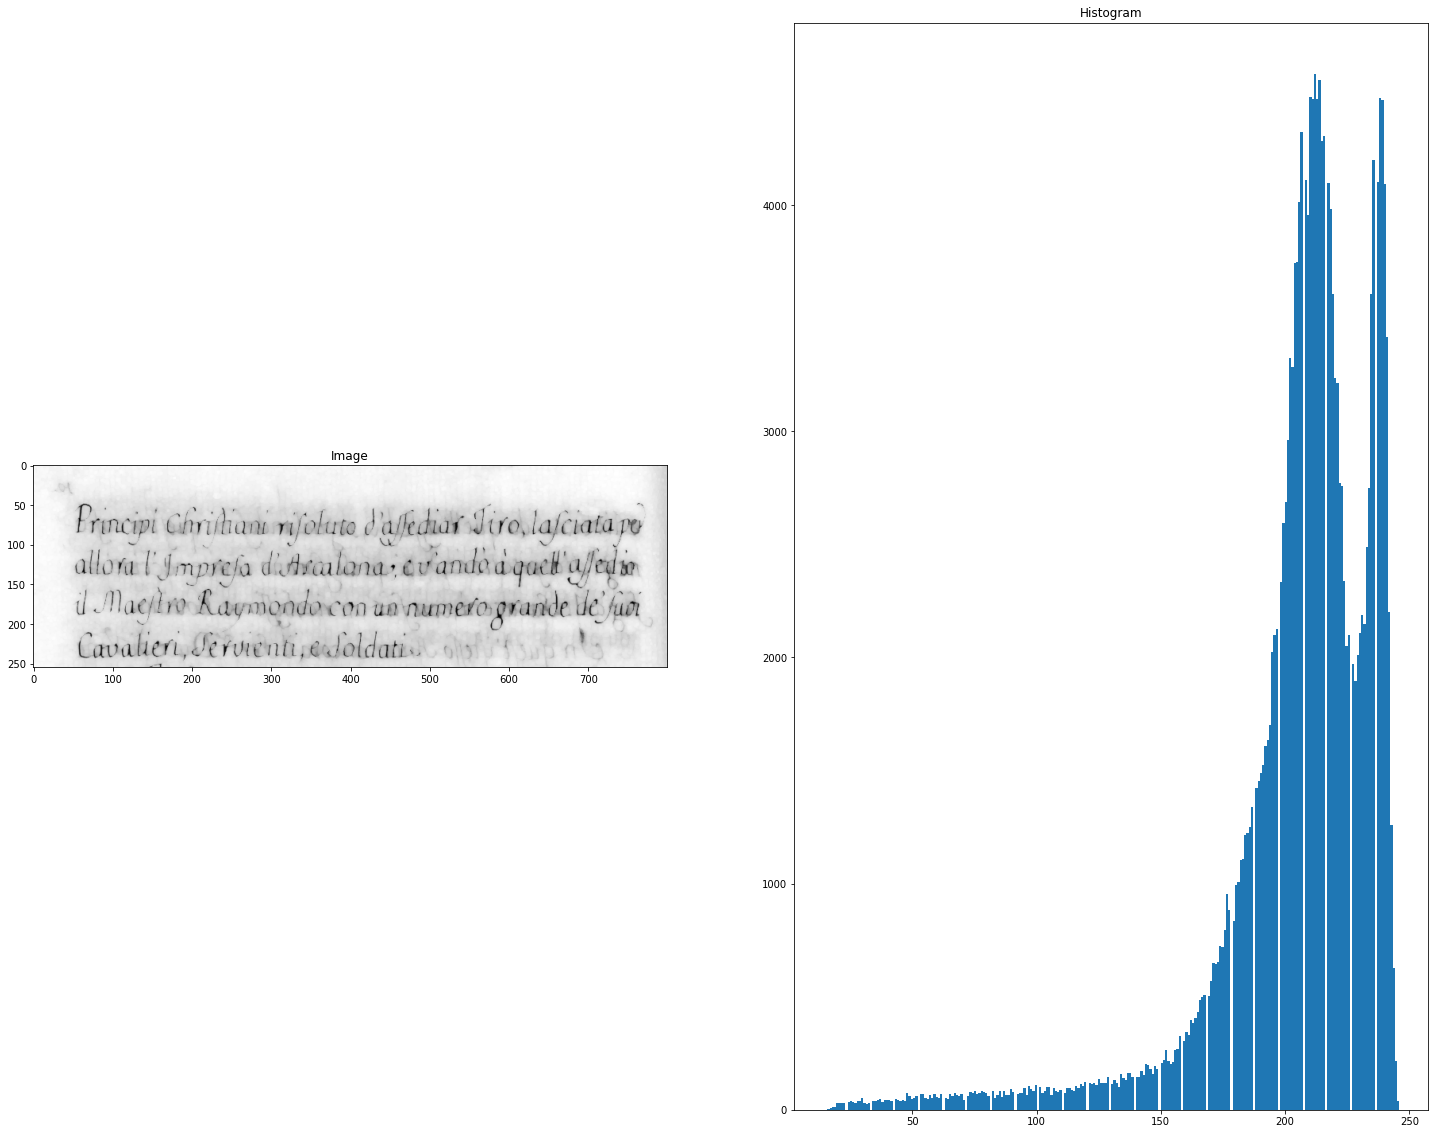

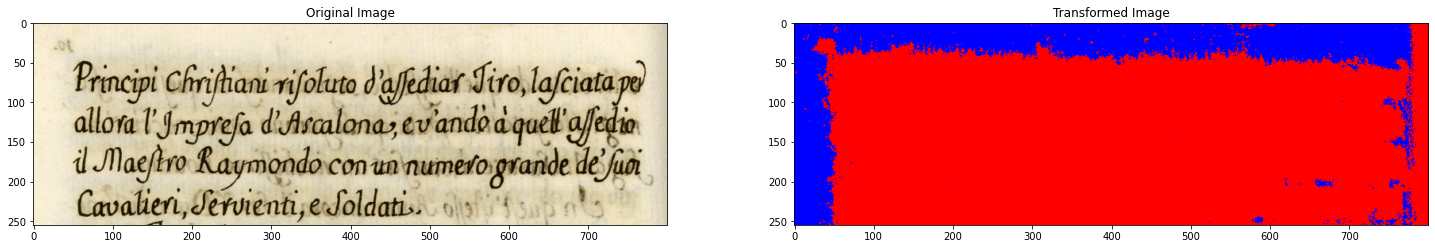

In [49]:
def imgAndPlot(img, gray):
    fig = plt.figure(figsize=(25, 20))
    ax1, ax2= fig.add_subplot(121), fig.add_subplot(122)
    ax1.set_title("Image")
    ax2.set_title("Histogram")
    ax1.imshow(img, cmap='gray')
    if gray:
        ax2.hist(img.flat, bins=256)
    else:
        colours = ('b', 'g', 'r')
        for i, colour in enumerate(colours):
            hist = cv2.calcHist([img], [i], None, [256], [0,256])
            ax2.plot(hist, color = colour)

img = images[os.listdir("images")[2]][:,:,::-1]
grayImage = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
imgAndPlot(grayImage, True)
output = dilation(grayImage, 3)
output = opening(output, 3)
imgAndPlot(output, True)


segm1 = (grayImage <= 226)
#segm2 = (grayImage < 220) & (grayImage >= 175)
segm3 = (grayImage > 226)

all_segments  = np.zeros((grayImage.shape[0], grayImage.shape[1], 3))
all_segments[segm1] = (1, 0, 0)
# all_segments[segm2] = (0, 1, 0)
all_segments[segm3] = (0, 0, 1)

showImages(img, all_segments)
